In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> Loaded dataset and put it into a pandas dataframe </b> </em> </p>

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = pd.Series(data.target)
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> Split data into test and train sets of equal sizes </b> </em> </p>

In [23]:
x = df.iloc[:, 0:30]
y = df.iloc[:, -1]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.5, random_state = 0)
x.shape
y.shape
y.head(0)

Series([], Name: target, dtype: int32)

<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> Logistic Regression on unscaled data </b> </em> </p>

In [4]:
logisticRegr = LogisticRegression()
logisticRegr.fit(xTrain, yTrain)
logisticRegr.predict(xTest)
score = logisticRegr.score(xTest, yTest)
print(score)

0.9543859649122807


<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> Linear SVM on unscaled data </b> </em> </p>

In [5]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(xTrain, yTrain)
linear_svc.predict(xTest)
score = linear_svc.score(xTest, yTest)
print(score)

0.9578947368421052


<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> SVM using RBF kernel on unscaled data </b> </em> </p>

In [59]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(xTrain, yTrain)
rbf_svc.predict(xTest)
scores = rbf_svc.score(xTest, yTest)
print(scores)

0.6456140350877193


<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> Standardization of data using StandardScalar </b> </em> </p>

In [60]:
scaler = StandardScaler()
x_scaled_train = scaler.fit_transform(xTrain.to_numpy())
x_scaled_test  = scaler.transform(xTest.to_numpy())
x_scaled_train

array([[-0.06748072, -0.5425099 , -0.13870518, ..., -0.59909152,
        -0.59762835, -0.98560064],
       [ 2.03933888,  0.6929602 ,  2.08132715, ...,  1.95859652,
         1.40932162,  0.91648179],
       [-0.91020856, -1.08757024, -0.91378691, ..., -0.78054011,
         0.44660079, -0.61298813],
       ...,
       [-1.35780308, -0.26634599, -1.35454356, ..., -1.04745929,
        -0.70374295, -0.14639814],
       [-1.27855318, -0.2905709 , -1.31757687, ..., -1.83974821,
        -1.54189447, -1.01307944],
       [-0.77905555,  1.09267111, -0.75738939, ..., -0.32589926,
        -1.22970226,  0.18114914]])

<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> Applying logistic regression on scaled data </b> </em> </p>

In [8]:
logisticRegr_scaled = LogisticRegression()
logisticRegr_scaled.fit(x_scaled_train, yTrain)
logisticRegr_scaled.predict(x_scaled_test)
score = logisticRegr_scaled.score(x_scaled_test, yTest)
print(score)

0.9789473684210527


<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> Applying linear SVC on scaled data </b> </em> </p>

In [9]:
linear_svc_scaled = svm.SVC(kernel='linear')
linear_svc_scaled.fit(x_scaled_train, yTrain)
linear_svc_scaled.predict(x_scaled_test)
linear_svc_scaled.score(x_scaled_test, yTest)
scores = linear_svc_scaled.score(x_scaled_test, yTest)
print(scores)

0.9649122807017544


<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> Applying RBF SVC on scaled data </b> </em> </p>

In [10]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(x_scaled_train, yTrain)
rbf_svc.predict(x_scaled_test)
scores = rbf_svc.score(x_scaled_test, yTest)
print(scores)

0.9719298245614035


<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> Finding the best C value using grid search and checking accuracy for a logistic regression model </b> </em> </p>

In [47]:
tuned_parameters = [ {'C': [0.001,0.01,0.1,1,10,100]}]
logreg=LogisticRegression()
clf_lr = GridSearchCV(logreg, tuned_parameters, cv=5, scoring='f1')
clf_lr.fit(xTrain, yTrain)

means_lr = clf_lr.cv_results_['mean_test_score']
std_lr   = clf_lr.cv_results_['std_test_score']

print("Best parameters set found on development set:")
print()
print(clf_lr.best_params_)
print()
print("Grid scores on development set:")
print()
clf_lr.predict(xTest)
score = clf_lr.score(xTest, yTest)
print(score)

Best parameters set found on development set:

{'C': 100}

Grid scores on development set:

0.9753424657534246


<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> Finding the best C value using grid search and checking accuracy for a linear SVM model </b> </em> </p>

In [50]:
tuned_parameters = [ {'kernel': ['linear'], 'C': [0.001,0.01,0.1,1,10,100, 1000]}]
clf_linear = GridSearchCV(svm.SVC(), tuned_parameters, cv=5, scoring='f1')
clf_linear.fit(xTrain, yTrain)

means_linear = clf_linear.cv_results_['mean_test_score']
std_linear   = clf_linear.cv_results_['std_test_score']

print("Best parameters set found on development set:")
print()
print(clf_linear.best_params_)
print()
print("Grid scores on development set:")
print()
clf_linear.predict(xTest)
score = clf_linear.score(xTest, yTest)
print(score)


Best parameters set found on development set:

{'C': 0.1, 'kernel': 'linear'}

Grid scores on development set:

0.958904109589041


<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> Finding the best C value using grid search and checking accuracy for a rbf SVM model </b> </em> </p>

In [49]:
tuned_parameters = [ {'kernel': ['rbf'], 'C': [0.001,0.01,0.1,1,10,100, 1000], 'gamma': [0.001, 0.0001]}]
clf_rbf = GridSearchCV(svm.SVC(), tuned_parameters, cv=5, scoring='f1')
clf_rbf.fit(xTrain, yTrain)

means_rbf = clf_rbf.cv_results_['mean_test_score']
std_rbf   = clf_rbf.cv_results_['std_test_score']

print("Best parameters set found on development set:")
print()
print(clf_rbf.best_params_)
print()
print("Grid scores on development set:")
print()
clf_rbf.predict(xTest)
score = clf_rbf.score(xTest, yTest)
print(score)


Best parameters set found on development set:

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:

0.964769647696477


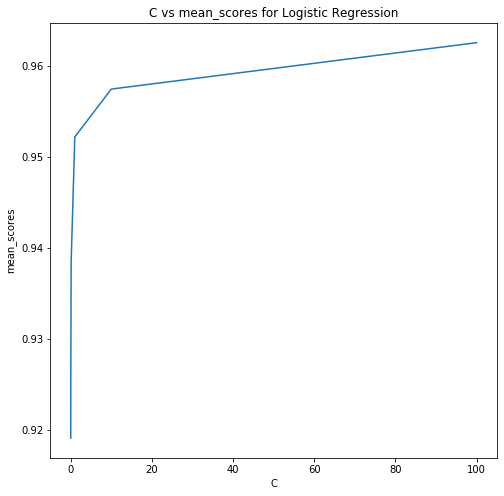

In [14]:
C_param_range =  [0.001,0.01,0.1,1,10,100]
plt.figure(figsize=(8,8))
plt.plot(C_param_range, means_lr)
plt.title('C vs mean_scores for Logistic Regression')
plt.xlabel('C')
plt.ylabel('mean_scores')
plt.show()

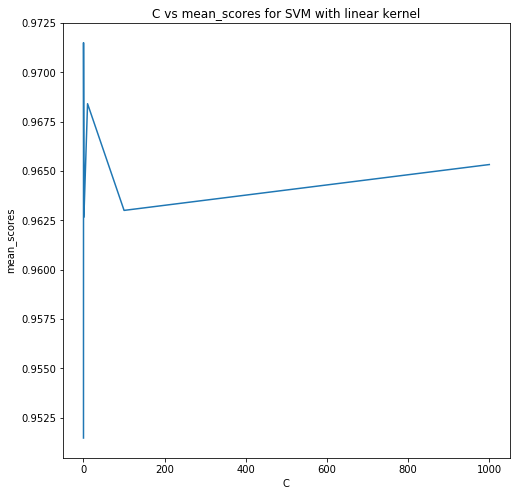

In [15]:
C_param_range = [0.001,0.01,0.1,1,10,100, 1000]
plt.figure(figsize=(8,8))
plt.plot(C_param_range, means_linear)
plt.title('C vs mean_scores for SVM with linear kernel')
plt.xlabel('C')
plt.ylabel('mean_scores')
plt.show()

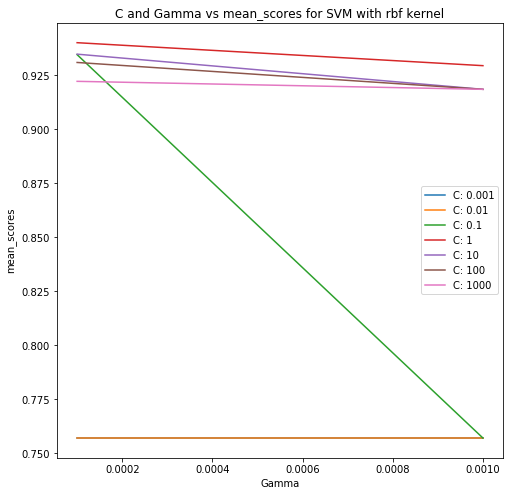

In [16]:
C_param_range = [0.001,0.01,0.1,1,10,100, 1000]
Gammas = [1e-3, 1e-4]
plt.figure(figsize=(8,8))

scores = np.array(means_rbf).reshape(len(C_param_range), len(Gammas))

for i, c in enumerate(C_param_range):
    plt.plot(Gammas, scores[i], label='C: '+str(c))

plt.title('C and Gamma vs mean_scores for SVM with rbf kernel')
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('mean_scores')
plt.show()

<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> Final results for each experiment </b> </em> </p>

| Model | Unscaled | Scaled | Tuned |
|--- |--- |--- |--- |
| Logistic     | 0.954 | 0.979 | 0.975 |
| SVM - Linear | 0.958 | 0.965 | 0.959 |
| SVM - RBF    | 0.646 | 0.972 | 0.965 |

<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> Inferences: 
    <br> Accuracy increases when data is scaled, especially for SVM using RBF kernel. </br>
    <br> This is because SVM tries to maximise the distance between the margins and the seperating plane. </br>
    <br> To avoid certain features in an unscaled dataset dominating our results, we need to scale data. </br>
    <br> SVM assumes that the data it works with is in a standard range. To avoid skewing results, it is better to scale the data before applying the SVM model.</br> </em> </p>

In [73]:
clf_lr.best_estimator_.coef_
coeff_lr = {}
for i, val in enumerate(xTrain):
    coeff_lr[val] = logisticRegr.coef_[0][i]
coeff_lr
sorted_coeff_lr = sorted(coeff_lr.items(), key=lambda kv: kv[1])
sorted_coeff_lr

[('worst concavity', -1.0813605482521562),
 ('worst compactness', -0.7010775842459611),
 ('worst symmetry', -0.4250709651384051),
 ('mean concavity', -0.42182006674573636),
 ('worst concave points', -0.42032218402417343),
 ('worst perimeter', -0.27751505737217785),
 ('mean compactness', -0.2710190648563588),
 ('worst texture', -0.22685921976938836),
 ('mean concave points', -0.2118062929271349),
 ('mean symmetry', -0.18731178972025264),
 ('worst smoothness', -0.11305416387235649),
 ('area error', -0.07548951235762612),
 ('concavity error', -0.06805153606114288),
 ('mean smoothness', -0.0679577546498926),
 ('worst fractal dimension', -0.0661517833258433),
 ('symmetry error', -0.03977163289543958),
 ('concave points error', -0.03122299027159026),
 ('compactness error', -0.027267143184192284),
 ('worst area', -0.025169797667588555),
 ('mean fractal dimension', -0.011588164546870361),
 ('smoothness error', -0.006199821318904994),
 ('fractal dimension error', 0.0004150256909263813),
 ('mean

In [77]:
coeff_linear = {}
for i, val in enumerate(xTrain):
    coeff_linear[val] = linear_svc.coef_[0][i]
coeff_linear
sorted_coeff_linear = sorted(coeff_linear.items(), key=lambda kv: kv[1])
sorted_coeff_linear

[('worst concavity', -0.8467767736524545),
 ('worst symmetry', -0.5187393212340254),
 ('worst concave points', -0.4232719660968296),
 ('mean concavity', -0.3731867129637269),
 ('mean symmetry', -0.3044916046208975),
 ('mean concave points', -0.2173663271975496),
 ('worst perimeter', -0.19404405002501335),
 ('worst smoothness', -0.18423321449660474),
 ('worst compactness', -0.17572893287675362),
 ('mean compactness', -0.1517471168475817),
 ('worst texture', -0.14124846532610036),
 ('mean smoothness', -0.12030100270280775),
 ('mean perimeter', -0.10320357369418787),
 ('concavity error', -0.04504427195209587),
 ('symmetry error', -0.04206475741997397),
 ('area error', -0.04051614407889659),
 ('concave points error', -0.034952330297121775),
 ('worst fractal dimension', -0.025495969482297126),
 ('mean fractal dimension', -0.015072388867718799),
 ('smoothness error', -0.013559055573396279),
 ('worst area', -0.012363254449496708),
 ('texture error', 0.009405769366028105),
 ('fractal dimension

<p style="font-family: Calibri; font-size:1.2em;color:green;"> <em> <b> Inferences: 
    <br> The 'mean radius' feature has the most impact on classification using logistic as well as SVM with linear kernel. </br> </em> </p>